Electric dipole moment: p = 1.00 C·m (two point charges)
Magnetic dipole moment: m = 0.79 A·m² (bar magnet)


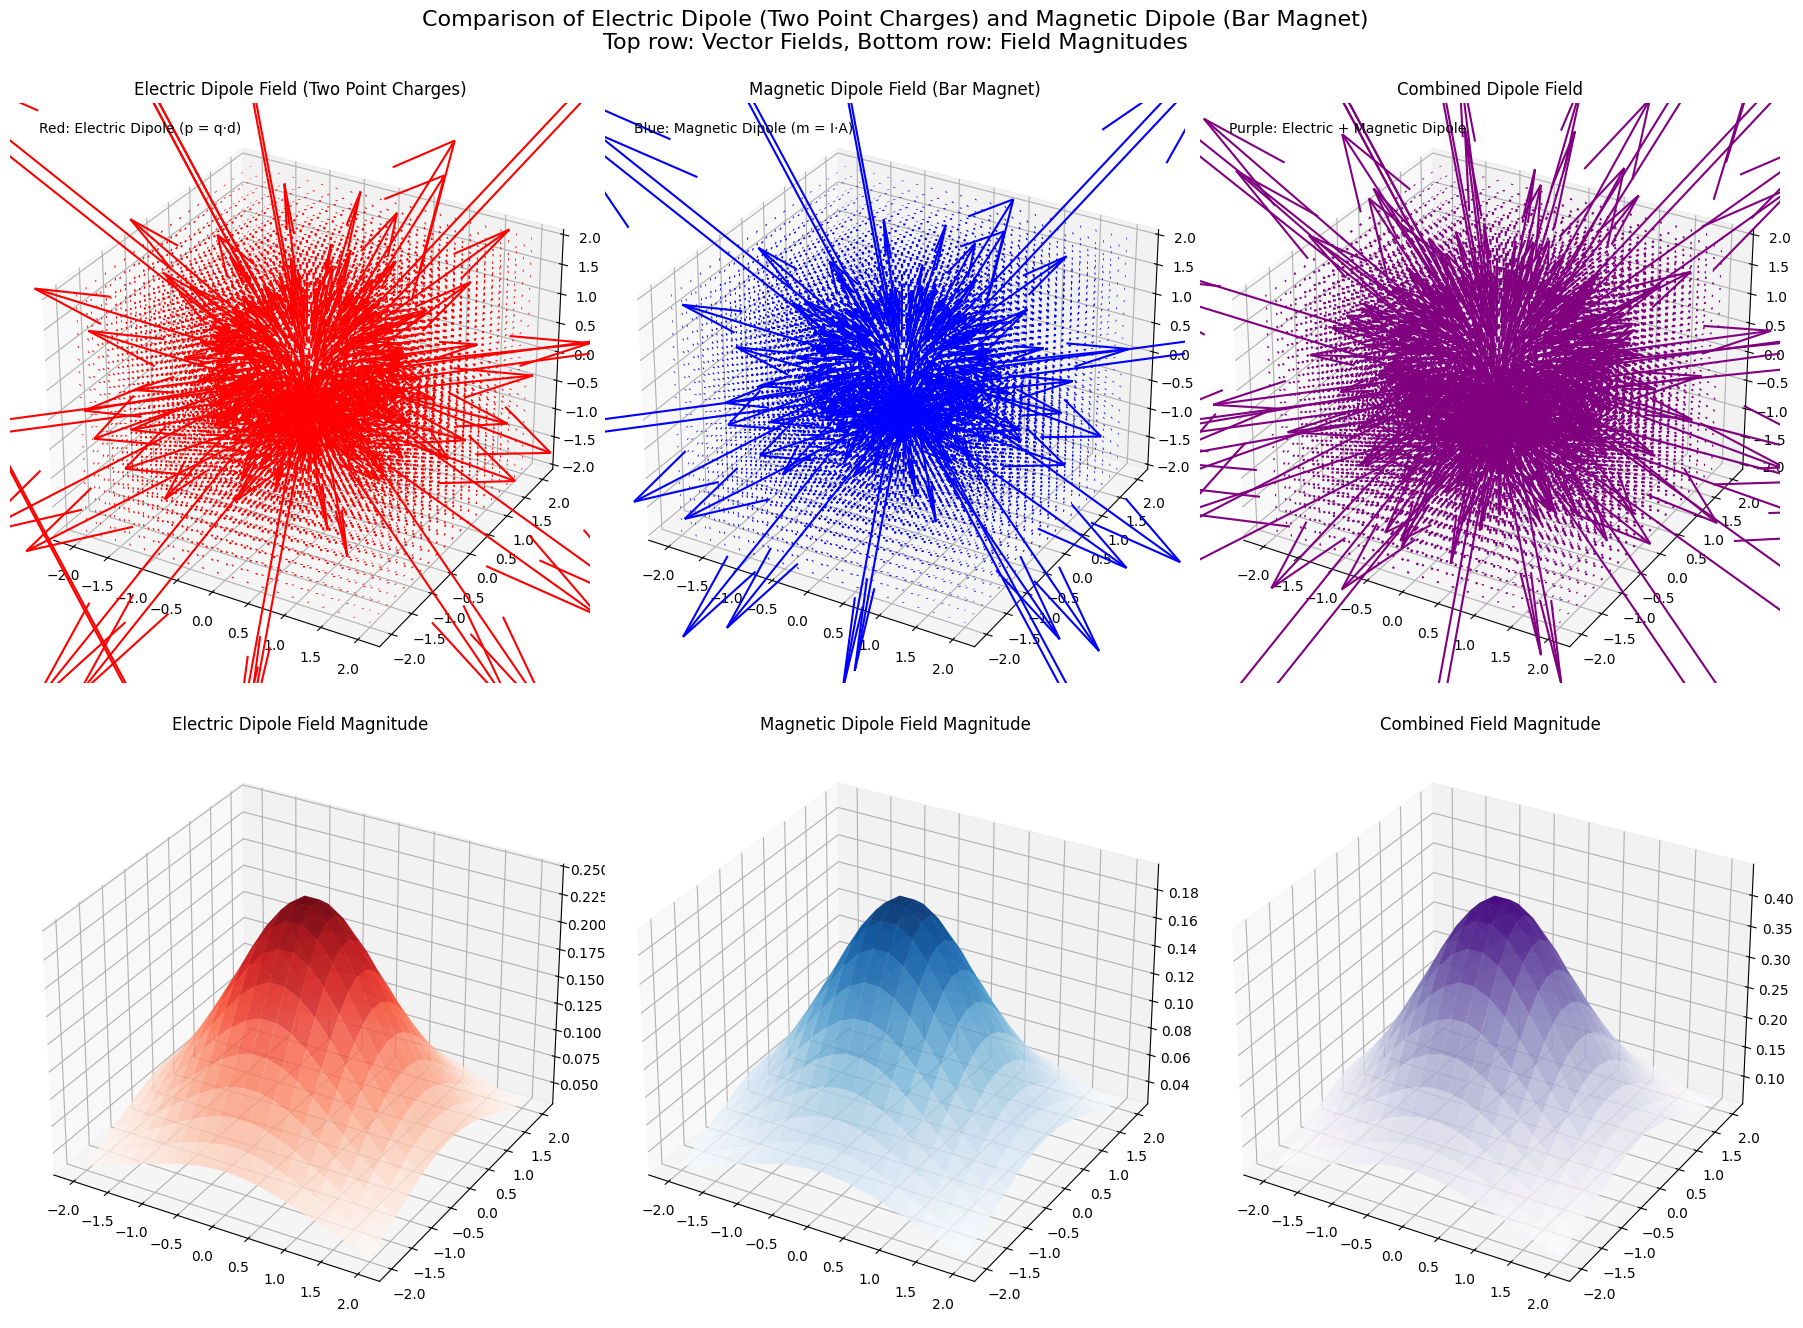


Output: Electric and magnetic dipoles are NOT the same magnitude.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

q = 1.0        # charge magnitude (C)
d = 1.0        # separation distance (m)
T = 1.0        # artificial timescale (s)


p = q * d


I = q / T
A = np.pi * (d / 2)**2
m = I * A

print(f"Electric dipole moment: p = {p:.2f} C·m (two point charges)")
print(f"Magnetic dipole moment: m = {m:.2f} A·m² (bar magnet)")


grid_points = 20
x = np.linspace(-2, 2, grid_points)
y = np.linspace(-2, 2, grid_points)
z = np.linspace(-2, 2, grid_points)
X, Y, Z = np.meshgrid(x, y, z)
R = np.sqrt(X**2 + Y**2 + Z**2) + 1e-9

theta = np.arccos(Z / R)
phi = np.arctan2(Y, X)


E_r = (2*p*np.cos(theta)) / (R**3)
E_theta = (p*np.sin(theta)) / (R**3)

E_x = E_r*np.sin(theta)*np.cos(phi) + E_theta*np.cos(theta)*np.cos(phi)
E_y = E_r*np.sin(theta)*np.sin(phi) + E_theta*np.cos(theta)*np.sin(phi)
E_z = E_r*np.cos(theta) - E_theta*np.sin(theta)


B_r = (2*m*np.cos(theta)) / (R**3)
B_theta = (m*np.sin(theta)) / (R**3)

B_x = B_r*np.sin(theta)*np.cos(phi) + B_theta*np.cos(theta)*np.cos(phi)
B_y = B_r*np.sin(theta)*np.sin(phi) + B_theta*np.cos(theta)*np.sin(phi)
B_z = B_r*np.cos(theta) - B_theta*np.sin(theta)

C_x = E_x + B_x
C_y = E_y + B_y
C_z = E_z + B_z


mag_E = np.sqrt(E_x**2 + E_y**2 + E_z**2)
mag_B = np.sqrt(B_x**2 + B_y**2 + B_z**2)
mag_C = np.sqrt(C_x**2 + C_y**2 + C_z**2)


fig = plt.figure(figsize=(18, 14))

ax1 = fig.add_subplot(231, projection='3d')
ax1.quiver(X, Y, Z, E_x, E_y, E_z, length=0.2, color='r')
ax1.set_title("Electric Dipole Field (Two Point Charges)", fontsize=12)
ax1.text2D(0.05, 0.95, "Red: Electric Dipole (p = q·d)", transform=ax1.transAxes, fontsize=10)


ax2 = fig.add_subplot(232, projection='3d')
ax2.quiver(X, Y, Z, B_x, B_y, B_z, length=0.2, color='b')
ax2.set_title("Magnetic Dipole Field (Bar Magnet)", fontsize=12)
ax2.text2D(0.05, 0.95, "Blue: Magnetic Dipole (m = I·A)", transform=ax2.transAxes, fontsize=10)


ax3 = fig.add_subplot(233, projection='3d')
ax3.quiver(X, Y, Z, C_x, C_y, C_z, length=0.2, color='purple')
ax3.set_title("Combined Dipole Field", fontsize=12)
ax3.text2D(0.05, 0.95, "Purple: Electric + Magnetic Dipole", transform=ax3.transAxes, fontsize=10)


ax4 = fig.add_subplot(234, projection='3d')
ax4.plot_surface(X[:,:,0], Y[:,:,0], mag_E[:,:,0], cmap='Reds', alpha=0.8)
ax4.set_title("Electric Dipole Field Magnitude", fontsize=12)

ax5 = fig.add_subplot(235, projection='3d')
ax5.plot_surface(X[:,:,0], Y[:,:,0], mag_B[:,:,0], cmap='Blues', alpha=0.8)
ax5.set_title("Magnetic Dipole Field Magnitude", fontsize=12)

ax6 = fig.add_subplot(236, projection='3d')
ax6.plot_surface(X[:,:,0], Y[:,:,0], mag_C[:,:,0], cmap='Purples', alpha=0.8)
ax6.set_title("Combined Field Magnitude", fontsize=12)

fig.suptitle(
    "Comparison of Electric Dipole (Two Point Charges) and Magnetic Dipole (Bar Magnet)\n" +
    "Top row: Vector Fields, Bottom row: Field Magnitudes",
    fontsize=16
)

plt.tight_layout()
plt.show()


if np.isclose(p, m, rtol=0.1):
    print("\nOutput: Electric and magnetic dipoles are approximately the same magnitude.")
else:
    print("\nOutput: Electric and magnetic dipoles are NOT the same magnitude.")
